# Step 3: Optimize the Model

In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")



In [ ]:
# Drop non-beneficial columns
application_df = application_df.drop(columns=["EIN", "NAME"])

# Bucket rare APPLICATION_TYPEs
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()
application_types_to_replace = list(app_type_counts[app_type_counts < 500].index)
application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(application_types_to_replace, "Other")

# Bucket rare CLASSIFICATIONs
class_counts = application_df["CLASSIFICATION"].value_counts()
classifications_to_replace = list(class_counts[class_counts < 1000].index)
application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(classifications_to_replace, "Other")

# Convert categorical variables using get_dummies
application_df = pd.get_dummies(application_df)

# Split data into features and target
X = application_df.drop("IS_SUCCESSFUL", axis=1)
y = application_df["IS_SUCCESSFUL"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Optimization Attempt #1

In [ ]:
# Define model
nn = tf.keras.models.Sequential()


In [ ]:
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))

# Third hidden layer (new)
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7000 - loss: 0.5943 - val_accuracy: 0.7293 - val_loss: 0.5526
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7277 - loss: 0.5554 - val_accuracy: 0.7349 - val_loss: 0.5570
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7321 - loss: 0.5502 - val_accuracy: 0.7335 - val_loss: 0.5557
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7305 - loss: 0.5512 - val_accuracy: 0.7341 - val_loss: 0.5489
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7324 - loss: 0.5456 - val_accuracy: 0.7355 - val_loss: 0.5577
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7312 - loss: 0.5498 - val_accuracy: 0.7324 - val_loss: 0.5533
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7321 - loss: 0.5469 - val_accuracy: 0.7364 - val_loss: 0.5500
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7277 - loss: 0.5516 - val_accuracy: 0.

In [ ]:
# Evaluate model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Loss: {model_loss:.4f}, Accuracy: {model_accuracy:.4f}")

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7368 - loss: 0.5491
Loss: 0.5546, Accuracy: 0.7299


# Optimization Attempt #2




In [ ]:
# Define model
nn = tf.keras.models.Sequential()

In [ ]:
# Input layer and first hidden layer
nn.add(tf.keras.layers.Dense(units=128, activation="relu", input_dim=X.shape[1]))
nn.add(tf.keras.layers.Dropout(0.2))  # Dropout added

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))
nn.add(tf.keras.layers.Dropout(0.2))  # Dropout added

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6954 - loss: 0.5997 - val_accuracy: 0.7304 - val_loss: 0.5565
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7199 - loss: 0.5652 - val_accuracy: 0.7357 - val_loss: 0.5493
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7254 - loss: 0.5635 - val_accuracy: 0.7343 - val_loss: 0.5476
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7313 - loss: 0.5521 - val_accuracy: 0.7347 - val_loss: 0.5482
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7276 - loss: 0.5567 - val_accuracy: 0.7372 - val_loss: 0.5486
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7277 - loss: 0.5584 - val_accuracy: 0.7376 - val_loss: 0.5471
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7307 - loss: 0.5555 - val_accuracy: 0.7386 - val_loss: 0.5464
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7346 - loss: 0.5513 - val_accuracy: 0.

In [ ]:
# Evaluate model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Loss: {model_loss:.4f}, Accuracy: {model_accuracy:.4f}")

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7361 - loss: 0.5518
Loss: 0.5571, Accuracy: 0.7291


# Optimization Attempt #3

In [ ]:
# Define the model
nn = tf.keras.models.Sequential()

In [ ]:
# Input + Hidden Layer 1
nn.add(tf.keras.layers.Dense(units=128, activation="relu", input_dim=X.shape[1]))
nn.add(tf.keras.layers.BatchNormalization())
nn.add(tf.keras.layers.Dropout(0.3))

# Hidden Layer 2
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))
nn.add(tf.keras.layers.BatchNormalization())
nn.add(tf.keras.layers.Dropout(0.3))

# Hidden Layer 3
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))
nn.add(tf.keras.layers.BatchNormalization())

# Output Layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Print the model summary
nn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,449 (64.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Train the model
fit_model = nn.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6684 - loss: 0.6477 - val_accuracy: 0.7328 - val_loss: 0.5585
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7088 - loss: 0.5820 - val_accuracy: 0.7343 - val_loss: 0.5547
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7118 - loss: 0.5796 - val_accuracy: 0.7318 - val_loss: 0.5518
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7155 - loss: 0.5729 - val_accuracy: 0.7378 - val_loss: 0.5467
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7196 - loss: 0.5666 - val_accuracy: 0.7372 - val_loss: 0.5479
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7276 - loss: 0.5620 - val_accuracy: 0.7341 - val_loss: 0.5475
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7203 - loss: 0.5662 - val_accuracy: 0.7312 - val_loss: 0.5480
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7269 - loss: 0.5611 - val_accu

In [ ]:
# Evaluate the model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Loss: {model_loss:.4f}, Accuracy: {model_accuracy:.4f}")

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7336 - loss: 0.5504
Loss: 0.5540, Accuracy: 0.7297


# Optimization Attempt #4

In [ ]:
# Define the model
nn = tf.keras.models.Sequential()

In [ ]:
# Input layer and first hidden layer
nn.add(tf.keras.layers.Dense(units=128, activation="relu", input_dim=X.shape[1]))
nn.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))
nn.add(tf.keras.layers.Dropout(0.2))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Print the model summary
nn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,001 (62.50 KB)

 Trainable params: 16,001 (62.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6926 - loss: 0.6014 - val_accuracy: 0.7339 - val_loss: 0.5550
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7223 - loss: 0.5707 - val_accuracy: 0.7349 - val_loss: 0.5496
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7334 - loss: 0.5564 - val_accuracy: 0.7353 - val_loss: 0.5529
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7239 - loss: 0.5582 - val_accuracy: 0.7324 - val_loss: 0.5543
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7200 - loss: 0.5663 - val_accuracy: 0.7366 - val_loss: 0.5490
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7246 - loss: 0.5619 - val_accuracy: 0.7382 - val_loss: 0.5488
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7274 - loss: 0.5539 - val_accuracy: 0.7378 - val_loss: 0.5524
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7263 - loss: 0.5599 - val_accu

In [ ]:
# Evaluate the model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Loss: {model_loss:.4f}, Accuracy: {model_accuracy:.4f}")

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7349 - loss: 0.5485
Loss: 0.5525, Accuracy: 0.7292


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

# Training and Validation Loss & Accuracy Curves

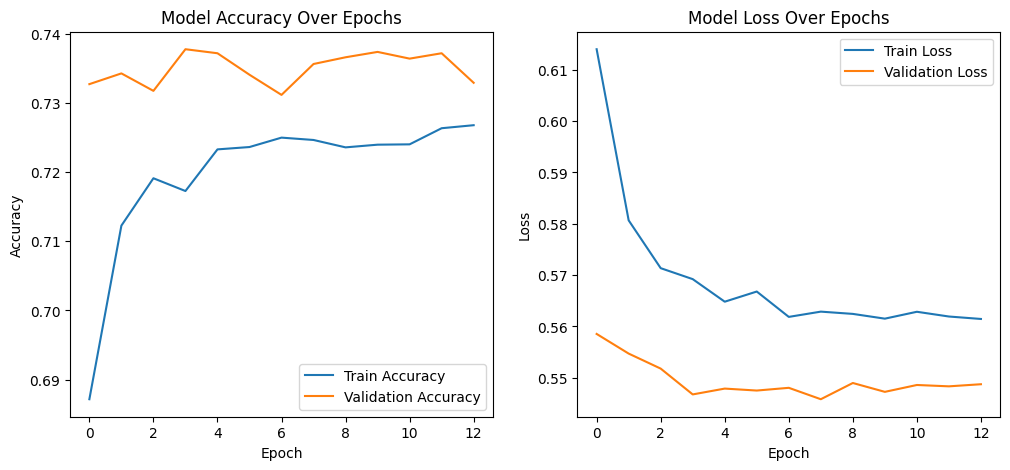

In [ ]:
import matplotlib.pyplot as plt

# Assuming fit_model is the result of model.fit() for your latest training

# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fit_model.history['accuracy'], label='Train Accuracy')
plt.plot(fit_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(fit_model.history['loss'], label='Train Loss')
plt.plot(fit_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

